# Import Required Libraries
Import necessary libraries such as pandas, numpy, and matplotlib for data handling and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load Data from Kaggle and VNstock
Load the FPT stock data from both Kaggle and VNstock sources into pandas DataFrames.

In [2]:
# Load data from Kaggle
kaggle_path = 'data_kaggle/FPT.csv'
df_kaggle = pd.read_csv(kaggle_path)
print("Kaggle data shape:", df_kaggle.shape)
print("Kaggle columns:", df_kaggle.columns.tolist())

# Load data from VNstock
vnstock_path = 'data/FPT_detail_2013_01_01_2024_12_31.csv'
df_vnstock = pd.read_csv(vnstock_path)
print("VNstock data shape:", df_vnstock.shape)
print("VNstock columns:", df_vnstock.columns.tolist())

Kaggle data shape: (2706, 9)
Kaggle columns: ['Symbol', 'Value', 'TradingDate', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
VNstock data shape: (3133, 6)
VNstock columns: ['time', 'open', 'high', 'low', 'close', 'volume']


# Synchronize Column Names
Write functions to standardize and synchronize column names between the two datasets for consistency.

In [3]:
def synchronize_columns(df_kaggle, df_vnstock):
    # Mapping for Kaggle columns
    kaggle_mapping = {
        'TradingDate': 'date',
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'Close': 'close',
        'Volume': 'volume'
    }
    df_kaggle_renamed = df_kaggle.rename(columns=kaggle_mapping)
    
    # VNstock columns are already in lowercase
    df_vnstock_renamed = df_vnstock.rename(columns={'time': 'date'})
    
    return df_kaggle_renamed, df_vnstock_renamed

df_kaggle_sync, df_vnstock_sync = synchronize_columns(df_kaggle, df_vnstock)
print("Synchronized Kaggle columns:", df_kaggle_sync.columns.tolist())
print("Synchronized VNstock columns:", df_vnstock_sync.columns.tolist())

Synchronized Kaggle columns: ['Symbol', 'Value', 'date', 'Time', 'open', 'high', 'low', 'close', 'volume']
Synchronized VNstock columns: ['date', 'open', 'high', 'low', 'close', 'volume']


# Filter Dissimilar Columns
Identify and filter out columns that do not match or are dissimilar between the two datasets.

In [4]:
def filter_common_columns(df1, df2):
    common_cols = set(df1.columns) & set(df2.columns)
    df1_filtered = df1[list(common_cols)]
    df2_filtered = df2[list(common_cols)]
    return df1_filtered, df2_filtered

df_kaggle_common, df_vnstock_common = filter_common_columns(df_kaggle_sync, df_vnstock_sync)
print("Common columns:", df_kaggle_common.columns.tolist())
print("Kaggle common shape:", df_kaggle_common.shape)
print("VNstock common shape:", df_vnstock_common.shape)

Common columns: ['open', 'high', 'low', 'volume', 'close', 'date']
Kaggle common shape: (2706, 6)
VNstock common shape: (3133, 6)


# Analyze Data
Perform basic data analysis such as descriptive statistics, data types, and missing values for both datasets.

In [5]:
def analyze_data(df, name):
    print(f"\n--- Analysis for {name} ---")
    print("Data types:")
    print(df.dtypes)
    print("\nDescriptive statistics:")
    print(df.describe())
    print("\nMissing values:")
    print(df.isnull().sum())

In [6]:
analyze_data(df_kaggle_common, "Kaggle")


--- Analysis for Kaggle ---
Data types:
open       int64
high       int64
low        int64
volume     int64
close      int64
date      object
dtype: object

Descriptive statistics:
               open           high            low        volume          close
count    2706.00000    2706.000000    2706.000000  2.706000e+03    2706.000000
mean    57422.96748   58046.304508   56850.461936  1.235729e+06   57446.526238
std     17722.25785   17989.604033   17466.725079  1.041875e+06   17699.925931
min         0.00000       0.000000       0.000000  0.000000e+00   35700.000000
25%     45500.00000   45900.000000   45100.000000  5.120275e+05   45500.000000
50%     49000.00000   49400.000000   48600.000000  9.528050e+05   48900.000000
75%     63500.00000   64500.000000   62300.000000  1.671092e+06   63300.000000
max    116500.00000  118900.000000  115200.000000  1.369700e+07  116600.000000

Missing values:
open      0
high      0
low       0
volume    0
close     0
date      0
dtype: int64
open 

In [7]:
analyze_data(df_vnstock_common, "VNstock")


--- Analysis for VNstock ---
Data types:
open      float64
high      float64
low       float64
volume      int64
close     float64
date       object
dtype: object

Descriptive statistics:
              open         high          low        volume        close
count  3133.000000  3133.000000  3133.000000  3.133000e+03  3133.000000
mean     27.955538    28.257395    27.678899  1.441355e+06    27.969154
std      28.619325    28.922419    28.344768  1.438846e+06    28.646037
min       3.540000     3.600000     3.530000  0.000000e+00     3.570000
25%       8.390000     8.470000     8.320000  5.050200e+05     8.390000
50%      14.800000    15.000000    14.630000  1.030570e+06    14.770000
75%      47.440000    47.870000    46.940000  1.934400e+06    47.430000
max     130.970000   132.690000   129.680000  1.372370e+07   131.490000

Missing values:
open      0
high      0
low       0
volume    0
close     0
date      0
dtype: int64


# Compare Similarity
Compare the similarity of the datasets by calculating correlations, differences in values, and visualizing overlaps.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16064\1415320789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16064\1415320789.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['date'] = pd.to_datetime(df2['date'], errors='coerce')


Overlapping dates: 725
Sample merged data:
        date  close_kaggle  close_vnstock
0 2013-02-01         36400           4.48
1 2013-03-01         35900           4.20
2 2013-04-01         36400           4.36
3 2013-07-01         36200           4.76
4 2013-08-01         38000           4.87
Correlation for open: 0.8599
Correlation for high: 0.8588
Correlation for low: 0.8609
Correlation for close: 0.8596
Correlation for volume: 0.3328


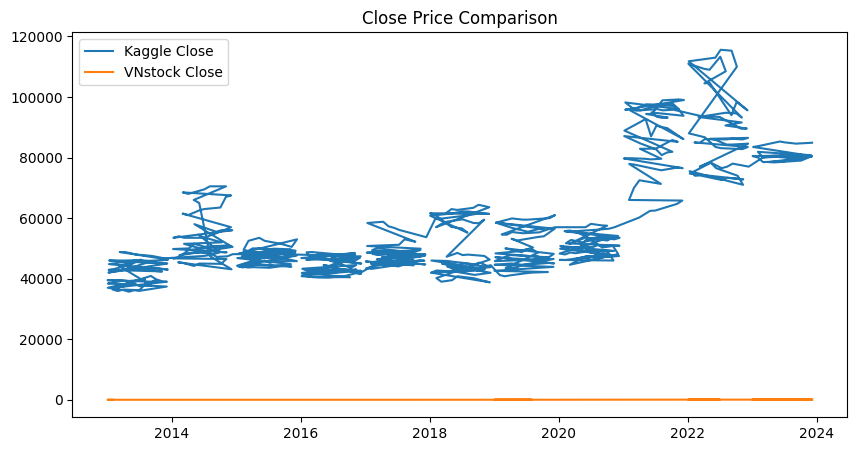

In [8]:
def compare_similarity(df1, df2, name1, name2):
    # Convert date columns to datetime
    df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
    df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
    
    # Filter to common date range, e.g., from 2013
    start_date = '2013-01-01'
    df1_filtered = df1[df1['date'] >= start_date].copy()
    df2_filtered = df2[df2['date'] >= start_date].copy()
    
    # Merge on date
    merged = pd.merge(df1_filtered, df2_filtered, on='date', suffixes=('_kaggle', '_vnstock'))
    
    if merged.empty:
        print("No overlapping dates found.")
        return
    
    print(f"Overlapping dates: {len(merged)}")
    
    # Print sample
    print("Sample merged data:")
    print(merged[['date', 'close_kaggle', 'close_vnstock']].head(5))
    
    # Calculate correlations for numeric columns
    numeric_cols = ['open', 'high', 'low', 'close', 'volume']
    for col in numeric_cols:
        if f'{col}_kaggle' in merged.columns and f'{col}_vnstock' in merged.columns:
            corr = merged[f'{col}_kaggle'].corr(merged[f'{col}_vnstock'])
            print(f"Correlation for {col}: {corr:.4f}")
    
    # Plot close prices
    plt.figure(figsize=(10, 5))
    plt.plot(merged['date'], merged['close_kaggle'], label=f'{name1} Close')
    plt.plot(merged['date'], merged['close_vnstock'], label=f'{name2} Close')
    plt.legend()
    plt.title('Close Price Comparison')
    plt.show()

compare_similarity(df_kaggle_common, df_vnstock_common, "Kaggle", "VNstock")

In [17]:
def merge_close_prices(vnstock_path, kaggle_path):
    # Load VNstock data (đã sửa time thành DD-MM-YYYY)
    df_vnstock = pd.read_csv(vnstock_path)
    df_vnstock.rename(columns={'time': 'date'}, inplace=True)
    df_vnstock['date'] = pd.to_datetime(df_vnstock['date'], format='%d-%m-%Y', errors='coerce')
    
    # Load Kaggle data
    df_kaggle = pd.read_csv(kaggle_path)
    df_kaggle.rename(columns={'TradingDate': 'date', 'Close': 'close'}, inplace=True)
    df_kaggle['date'] = pd.to_datetime(df_kaggle['date'], format='%d/%m/%Y', errors='coerce')
    
    # Merge trên date, chỉ lấy close
    merged = pd.merge(df_vnstock[['date', 'close']], df_kaggle[['date', 'close']], on='date', suffixes=('_vnstock', '_kaggle'))
    
    # Thêm cột date format DD-MM-YYYY
    merged['date_dd_mm_yyyy'] = merged['date'].dt.strftime('%d-%m-%Y')
    
    return merged[['date_dd_mm_yyyy', 'close_vnstock', 'close_kaggle']]

# Gọi hàm
vnstock_path = 'data/FPT_detail_2013_01_01_2024_12_31.csv'
kaggle_path = 'data_kaggle/FPT.csv'
merged_close_new = merge_close_prices(vnstock_path, kaggle_path)

# Hiển thị kết quả
print("Bảng giá đóng cửa ghép từ VNstock và Kaggle:")
print(merged_close_new.head(20))

Bảng giá đóng cửa ghép từ VNstock và Kaggle:
   date_dd_mm_yyyy  close_vnstock  close_kaggle
0       02-01-2013           4.13         36400
1       03-01-2013           4.07         35900
2       04-01-2013           4.13         36400
3       07-01-2013           4.11         36200
4       08-01-2013           4.31         38000
5       09-01-2013           4.42         39000
6       10-01-2013           4.48         39500
7       11-01-2013           4.41         38900
8       14-01-2013           4.28         37700
9       15-01-2013           4.33         38200
10      16-01-2013           4.38         38600
11      17-01-2013           4.32         38100
12      18-01-2013           4.30         37900
13      21-01-2013           4.28         37700
14      22-01-2013           4.21         37100
15      23-01-2013           4.21         37100
16      24-01-2013           4.31         38000
17      25-01-2013           4.46         39300
18      28-01-2013           4.52         3

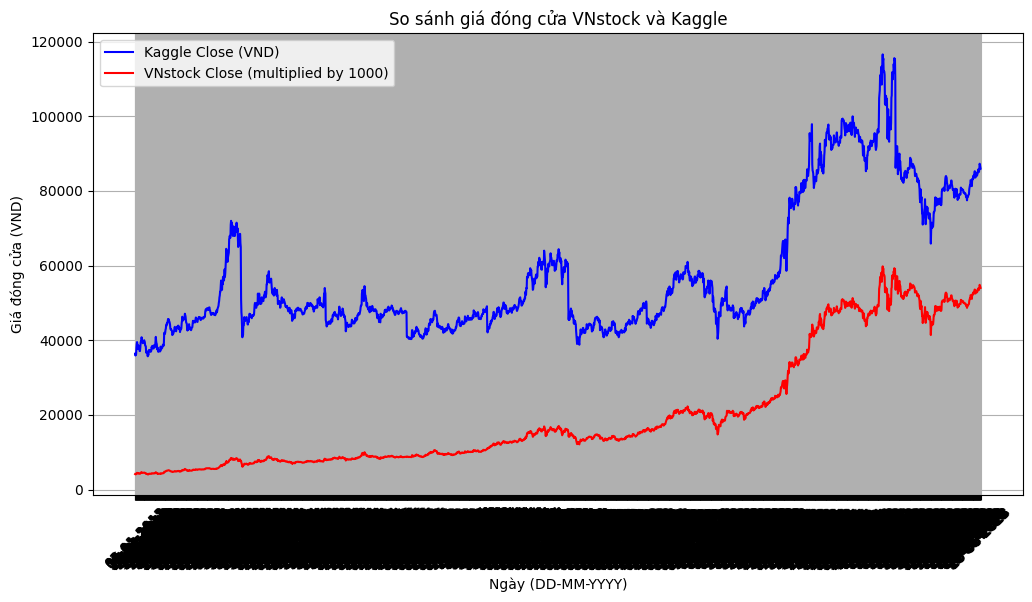

In [26]:
# Vẽ biểu đồ so sánh giá đóng cửa của 2 nguồn
plt.figure(figsize=(12, 6))
plt.plot(merged_close_new['date_dd_mm_yyyy'], merged_close_new['close_kaggle'], label='Kaggle Close (VND)', color='blue')
plt.plot(merged_close_new['date_dd_mm_yyyy'], merged_close_new['close_vnstock'] * 1000, label='VNstock Close (multiplied by 1000)', color='red')
plt.xlabel('Ngày (DD-MM-YYYY)')
plt.ylabel('Giá đóng cửa (VND)')
plt.title('So sánh giá đóng cửa VNstock và Kaggle')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
import pandas as pd
# load 2 bảng: vnstock và ref (Kaggle/Yahoo)
vn = pd.read_csv('data\FPT_detail_2013_01_01_2024_12_31.csv', parse_dates=['time'], dayfirst=True)
ref = pd.read_csv('data_kaggle\FPT.csv', parse_dates=['TradingDate'], dayfirst=True)

# join on date
df = vn.merge(ref[['TradingDate','Close']], left_on='time', right_on='TradingDate', suffixes=('_vn','_ref'))
df['ratio'] = df['Close'] / df['close']
# quick stats
print(df['ratio'].describe())
# inspect first 20 ratios
print(df[['time','close','Close','ratio']].head(20))

count    2706.000000
mean     4203.905801
std      2254.952449
min      1591.511936
25%      2289.524119
50%      3783.058497
75%      5458.879619
max      8824.940048
Name: ratio, dtype: float64
         time  close  Close        ratio
0  2013-01-02   4.13  36400  8813.559322
1  2013-01-03   4.07  35900  8820.638821
2  2013-01-04   4.13  36400  8813.559322
3  2013-01-07   4.11  36200  8807.785888
4  2013-01-08   4.31  38000  8816.705336
5  2013-01-09   4.42  39000  8823.529412
6  2013-01-10   4.48  39500  8816.964286
7  2013-01-11   4.41  38900  8820.861678
8  2013-01-14   4.28  37700  8808.411215
9  2013-01-15   4.33  38200  8822.170901
10 2013-01-16   4.38  38600  8812.785388
11 2013-01-17   4.32  38100  8819.444444
12 2013-01-18   4.30  37900  8813.953488
13 2013-01-21   4.28  37700  8808.411215
14 2013-01-22   4.21  37100  8812.351544
15 2013-01-23   4.21  37100  8812.351544
16 2013-01-24   4.31  38000  8816.705336
17 2013-01-25   4.46  39300  8811.659193
18 2013-01-28   4.52  398